In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
#train and test data is loaded
train=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

****

# EDA

In [5]:
train.shape

(175000, 17)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [7]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [8]:
train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


In [9]:
train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

In [10]:
print('Missing value in passenger_count: ',round(train['passenger_count'].isnull().mean(),4)*100,'%')
print('Missing value in RatecodeID: ',round(train['RatecodeID'].isnull().mean(),4)*100,'%')
print('Missing value in store_and_fwd_flag: ',round(train['store_and_fwd_flag'].isnull().mean(),4)*100,'%')
print('Missing value in congestion_surcharge: ',round(train['congestion_surcharge'].isnull().mean(),4)*100,'%')
print('Missing value in Airport_fee: ',round(train['Airport_fee'].isnull().mean(),4)*100,'%')

Missing value in passenger_count:  3.47 %
Missing value in RatecodeID:  3.47 %
Missing value in store_and_fwd_flag:  3.47 %
Missing value in congestion_surcharge:  3.47 %
Missing value in Airport_fee:  3.47 %


In [11]:
#function gives the number of outliers for the given column
def count_outliers(column):
    Q1,Q3=np.percentile(column,(25,75))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

In [12]:
trip_distance_outliers=count_outliers(train['trip_distance'])
passenger_count_outliers=count_outliers(train['passenger_count'])
tolls_amount_outliers=count_outliers(train['tolls_amount'])
tip_amount_outliers=count_outliers(train['tip_amount'])

In [13]:
#Percentage wise outliers of trip_distance,passenger_count,tolls_amount,tip_amount,Airport_fee,congestion_surcharge
print('**Outliers**')
print('trip_distance: ',round((trip_distance_outliers/175000)*100,2),'%')
print('passenger_count:',round((passenger_count_outliers/175000)*100,2),'%')
print('tolls_amount: ',round((tolls_amount_outliers/175000)*100,2),'%')
print('tip_amount: ',round((tip_amount_outliers/175000)*100,2),'%')

**Outliers**
trip_distance:  13.79 %
passenger_count: 0.0 %
tolls_amount:  8.96 %
tip_amount:  6.41 %


 **Insights**
* There are **missing values** in passenger_count,RatecodeID, store_and_fwd_flag,congestion_surcharge,Airport_fee
* There are 13.79 %, 8.96 %, 6.41 % **outliers** present in trip_distance,tolls_amount,tip_amount columns respectively.

In [14]:
train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [15]:
train['tpep_dropoff_datetime'] = pd.to_datetime(train['tpep_dropoff_datetime'])
train['tpep_pickup_datetime'] = pd.to_datetime(train['tpep_pickup_datetime'])
test['tpep_dropoff_datetime'] = pd.to_datetime(test['tpep_dropoff_datetime'])
test['tpep_pickup_datetime'] = pd.to_datetime(test['tpep_pickup_datetime'])

In [16]:
train['time_difference']=(train['tpep_dropoff_datetime']-train['tpep_pickup_datetime']).dt.total_seconds()
test['time_difference']=(test['tpep_dropoff_datetime']-test['tpep_pickup_datetime']).dt.total_seconds()

In [17]:
train['time_difference']=train['time_difference']/60
test['time_difference']=test['time_difference']/60

In [18]:
train.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1,inplace=True)
test.drop(['tpep_dropoff_datetime','tpep_pickup_datetime'],axis=1,inplace=True)

In [19]:
#time_difference is converted to positive by absolute
train['time_difference']=train['time_difference'].abs()
test['time_difference']=test['time_difference'].abs()

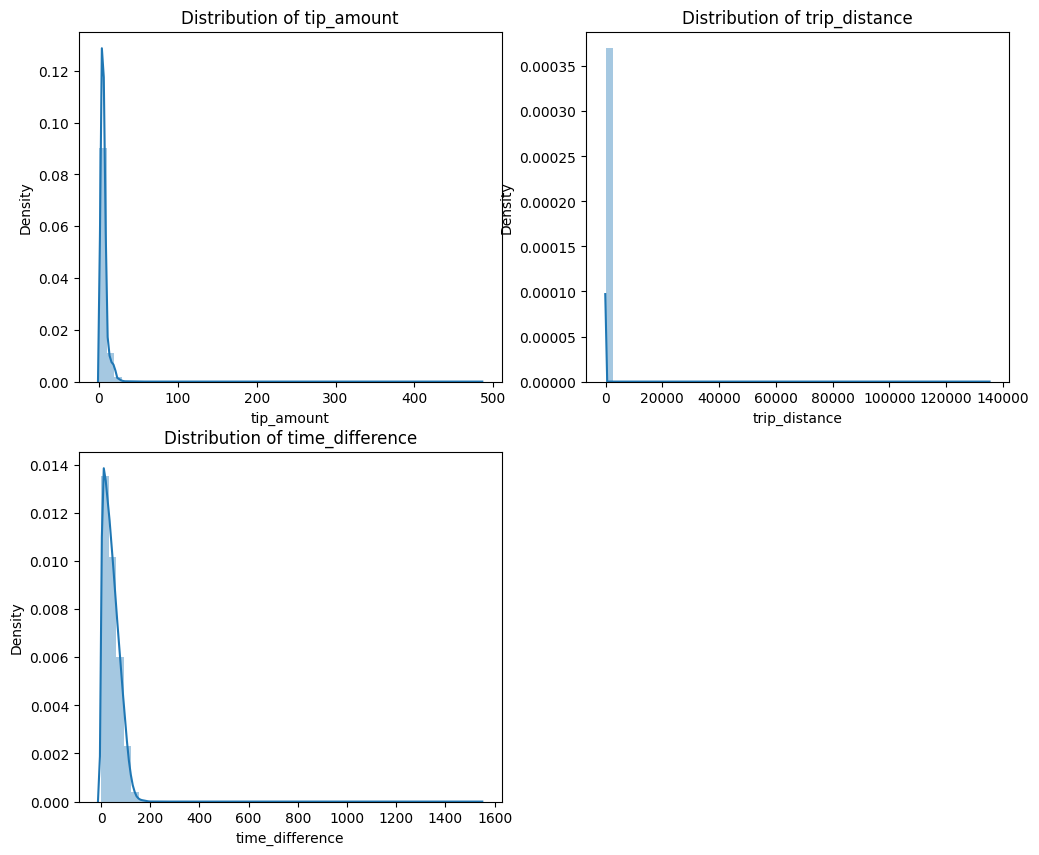

In [20]:
#distribution curve for tip_amount,trip_distance,time_difference
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.distplot(train['tip_amount'])
plt.title('Distribution of tip_amount')

plt.subplot(2, 2, 2)
sns.distplot(train['trip_distance'])
plt.title('Distribution of trip_distance')

plt.subplot(2, 2, 3)
sns.distplot(train['time_difference'])
plt.title('Distribution of time_difference')

plt.show()

* columns 'tip_amount','trip_distance','time_difference' are **right skewed** so to convert this columns into normal distribution curve log transformation is applied.
* Above 3 columns have high density at 0.

In [21]:
#log transformation applied to tip_amount,trip_distance,time_difference(train data)
train['tip_amount']=np.log(train['tip_amount']+1)
train['trip_distance']=np.log(train['trip_distance']+1)
train['time_difference']=np.log(train['time_difference']+1)

In [22]:
#log transformation applied to tip_amount,trip_distance,time_difference(test data)
test['tip_amount']=np.log(test['tip_amount']+1)
test['trip_distance']=np.log(test['trip_distance']+1)
test['time_difference']=np.log(test['time_difference']+1)


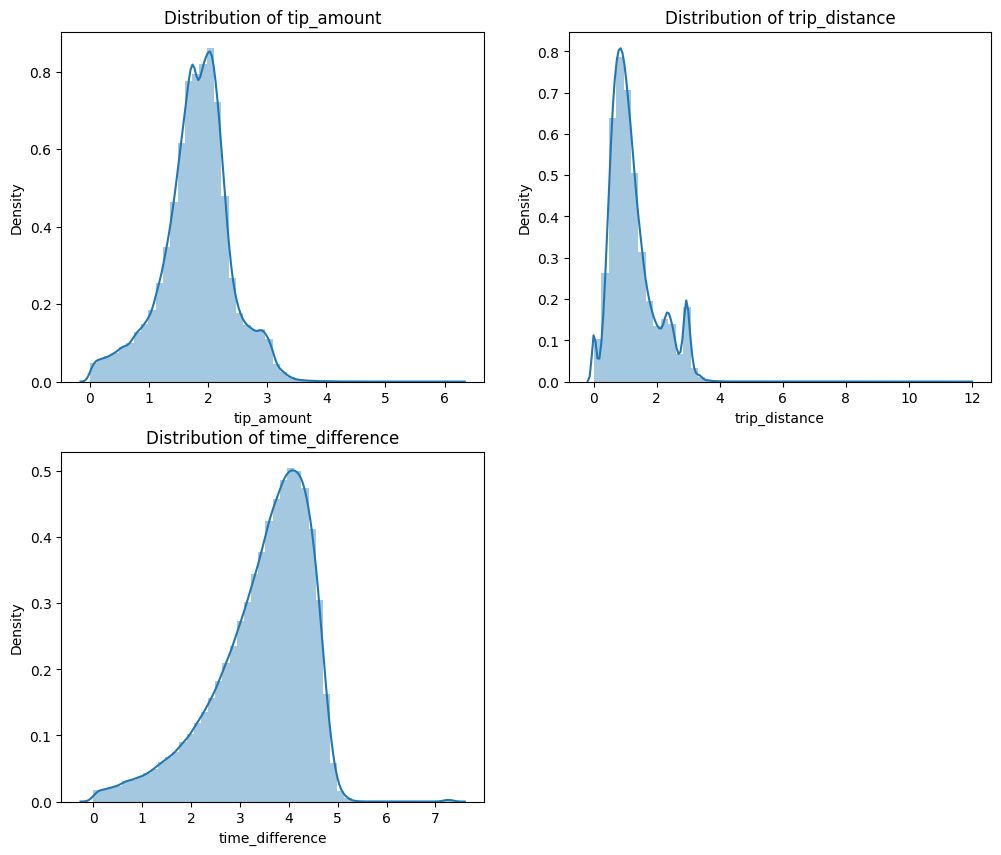

In [23]:
#ploting distribution curve after log transformation
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.distplot(train['tip_amount'])
plt.title('Distribution of tip_amount')

plt.subplot(2, 2, 2)
sns.distplot(train['trip_distance'])
plt.title('Distribution of trip_distance')

plt.subplot(2, 2, 3)
sns.distplot(train['time_difference'])
plt.title('Distribution of time_difference')

plt.show()

* After applying log transformation **tip_amount**, **time_difference** are changing towards normal distribution, but **trip_distance** is not changing that much.

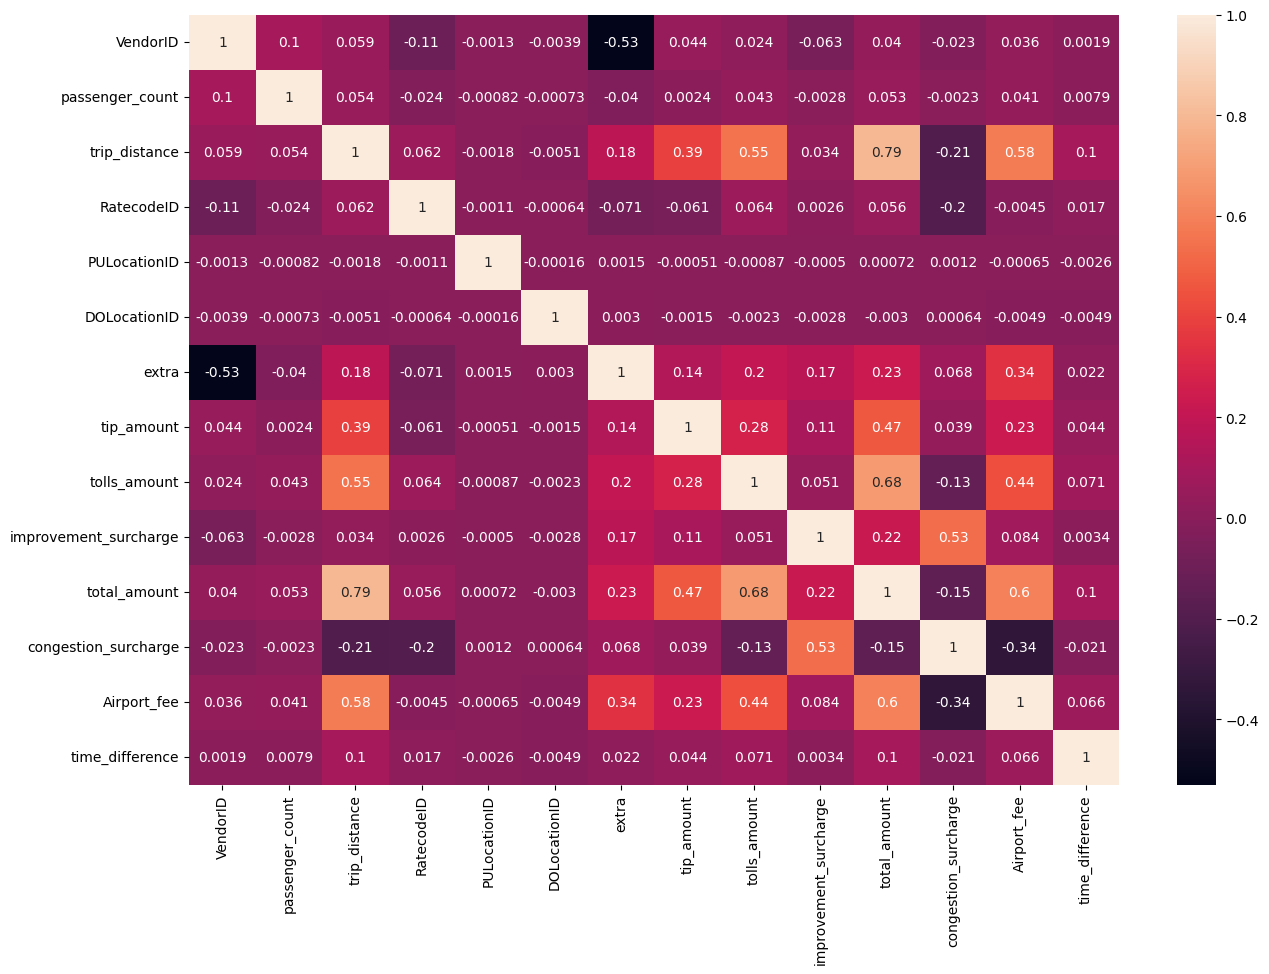

In [24]:
temp=train[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'time_difference']].copy()
c=temp.corr()
plt.figure(figsize=(15,10))
sns.heatmap(c,annot=True)
plt.show()

* The features 'trip_distance,' 'tolls_amount,' 'tip_amount,' and 'Airport_fee' exhibit strong positive correlations of 0.79, 0.68, 0.47, and 0.6, respectively, with the target feature '**total_amount**.'
* improvement_surcharge, extra, time_difference features are correlated with **total_amount** of 0.22, 0.23, 0.1 respectively.
* congestion_surcharge is negatively correlated with **total_amount** of -0.15 value.

*****

# PreProcessing

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
#null values of test dataset
test.isnull().sum()

VendorID                    0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
time_difference             0
dtype: int64

In [27]:
#null values of train dataset
train.isnull().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
time_difference             0
dtype: int64

In [28]:
cat_cols=['passenger_count','RatecodeID','store_and_fwd_flag','congestion_surcharge','Airport_fee'] #categotical columns to apply simple imputer 
encode_cols=['store_and_fwd_flag','payment_type']  # categorical columns to apply encoder

In [29]:
train.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'time_difference'],
      dtype='object')

In [30]:
test.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee', 'time_difference'],
      dtype='object')

In [31]:
target_column = train.pop('total_amount')
# train['total_amount'] = target_column

In [32]:
target_column=target_column.to_frame()

In [33]:
train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,time_difference
0,1,1.0,1.144223,1.0,N,120,9,Credit Card,2.5,2.099929,0.0,1.0,2.5,0.0,3.841601
1,0,1.0,1.308333,1.0,N,15,215,Credit Card,3.5,1.955493,0.0,1.0,2.5,0.0,4.165631
2,1,1.0,0.765468,1.0,N,167,223,Credit Card,0.0,1.631502,0.0,1.0,2.5,0.0,4.000949
3,0,1.0,0.336472,1.0,N,128,239,Credit Card,2.5,2.002976,0.0,1.0,2.5,0.0,4.058142
4,1,3.0,0.741937,1.0,N,203,52,Credit Card,1.0,1.752564,0.0,1.0,2.5,0.0,2.987364


In [34]:
# pipeline for simple imputer
imputer_pipeline = Pipeline([
    ('imputer', ColumnTransformer(transformers=[
        ('cat', SimpleImputer(strategy='most_frequent'), cat_cols)
    ], remainder='passthrough'))
])

# pipeline for encoding 
encoder_pipeline = Pipeline([
    ('encoder', ColumnTransformer(transformers=[
        ('ohe', OneHotEncoder(), [2,9])
    ], remainder='passthrough'))
])

scaling_pipeline=Pipeline([
    ('numeric',ColumnTransformer(transformers=[
        ('num',StandardScaler(),[12,15,16,17,19])
    ],remainder='passthrough'))
])

# Combined the two pipelines into one using a final pipeline
final_pipeline = Pipeline([
    ('imputer', imputer_pipeline),
    ('encoder', encoder_pipeline),
    ('scaler',scaling_pipeline)
],verbose=True)

# Applied the pipeline to the train and test datasets
train_df = final_pipeline.fit_transform(train)
test_df= final_pipeline.transform(test)
print("transformation of train and test dataset is done.")

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   0.6s
[Pipeline] ........... (step 2 of 3) Processing encoder, total=   0.3s
[Pipeline] ............ (step 3 of 3) Processing scaler, total=   0.3s
transformation of train and test dataset is done.


In [35]:
print('Most frequent values of imputer pipeline :',imputer_pipeline.named_steps['imputer'].named_transformers_['cat'].statistics_)
print('Mean of standard scaler :',scaling_pipeline.named_steps['numeric'].named_transformers_['num'].mean_)
print('Standard deviation of standard scaler :',scaling_pipeline.named_steps['numeric'].named_transformers_['num'].scale_)

Most frequent values of imputer pipeline : [1.0 1.0 'N' 2.5 0.0]
Mean of standard scaler : [1.22695843 1.93214349 1.80083334 0.64681629 3.45362683]
Standard deviation of standard scaler : [0.71661071 1.94849177 0.58179073 2.32826717 0.9743237 ]


In [36]:
train_df[0]

array([-0.11545407350626725, 0.2914338782563562, 0.5140945974827965,
       -0.27781016463900604, 0.39819796068730257, 1.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 1.0, 1.0, 2.5, 0.0, 1, 120, 9, 1.0], dtype=object)

In [37]:
test_df[0]

array([0.7764784822773976, -0.4783923126686701, 0.2658847501677894,
       -0.27781016463900604, -1.892788731114725, 1.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 1.0, 1.0, 2.5, 0.0, 1, 20, 3, 1.0], dtype=object)

In [38]:
# final train dataset
columns=['trip_distance','extra','tip_amount','tolls_amount', 'time_difference','store_fwd_N','store_fwd_Y','c1','c2','c3','c4','c5','passenger_count', 'RatecodeID',
       'congestion_surcharge', 'Airport_fee', 'VendorID', 'PULocationID', 'DOLocationID', 'improvement_surcharge']
transform_df=pd.DataFrame(train_df,columns=columns)


In [39]:
# final test dataset
test_columns=['trip_distance','extra','tip_amount','tolls_amount', 'time_difference','store_fwd_N','store_fwd_Y','c1','c2','c3','c4','c5','passenger_count', 'RatecodeID',
       'congestion_surcharge', 'Airport_fee', 'VendorID', 'PULocationID', 'DOLocationID', 'improvement_surcharge']
transform_test=pd.DataFrame(test_df,columns=test_columns)

In [40]:
transform_df.head()

,trip_distance,extra,tip_amount,tolls_amount,time_difference,store_fwd_N,store_fwd_Y,c1,c2,c3,c4,c5,passenger_count,RatecodeID,congestion_surcharge,Airport_fee,VendorID,PULocationID,DOLocationID,improvement_surcharge
0,-0.115454,0.291434,0.514095,-0.27781,0.398198,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,1,120,9,1.0
1,0.113555,0.804651,0.265833,-0.27781,0.730768,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,0,15,215,1.0
2,-0.643991,-0.99161,-0.291052,-0.27781,0.561746,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,1,167,223,1.0
3,-1.242636,0.291434,0.347449,-0.27781,0.620445,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,0,128,239,1.0
4,-0.676826,-0.478392,-0.082967,-0.27781,-0.47855,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.5,0.0,1,203,52,1.0


In [41]:
transform_test.head()

,trip_distance,extra,tip_amount,tolls_amount,time_difference,store_fwd_N,store_fwd_Y,c1,c2,c3,c4,c5,passenger_count,RatecodeID,congestion_surcharge,Airport_fee,VendorID,PULocationID,DOLocationID,improvement_surcharge
0,0.776478,-0.478392,0.265885,-0.27781,-1.892789,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,1,20,3,1.0
1,-0.133345,0.291434,0.295698,-0.27781,-1.23402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,1,9,81,1.0
2,-0.780241,0.291434,-0.33453,-0.27781,0.782031,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,1,92,90,1.0
3,-0.891937,0.804651,0.444011,-0.27781,-0.87717,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2.5,0.0,0,19,102,1.0
4,0.536522,-0.99161,-1.541865,-0.27781,-0.075128,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,131,229,1.0


**Train - Test spliting**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(transform_df,target_column,test_size=0.2,random_state=42)

*****

# Model Training

In [44]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

**Linear Regression**

In [45]:
l=LinearRegression()

In [46]:
print('-------Linear Regression-------')
l.fit(x_train,y_train)
print('R2 score :',round(r2_score(y_test,l.predict(x_test)),6))
print('Mean Squared Error :',round(mean_squared_error(y_test,l.predict(x_test)),6))
print('Mean Absolute Error :',round(mean_absolute_error(y_test,l.predict(x_test)),6))

-------Linear Regression-------
R2 score : 0.787198
Mean Squared Error : 138.482402
Mean Absolute Error : 5.526658


**Decision Tree Regression**

In [47]:
d=DecisionTreeRegressor()

In [48]:
print('--------Decision Tree Regression-------')
d.fit(x_train,y_train)
print('R2 score :',round(r2_score(y_test,d.predict(x_test)),6))
print('Mean Squared Error  :',round(mean_squared_error(y_test,d.predict(x_test)),6))
print('Mean Absolute Error :',round(mean_absolute_error(y_test,d.predict(x_test)),6))

--------Decision Tree Regression-------
R2 score : 0.895608
Mean Squared Error  : 67.933762
Mean Absolute Error : 3.828133


In [49]:
kfold=KFold(10)
results=cross_val_score(d,x_train,y_train,cv=kfold)
print('Means of R2 scores: ',np.mean(results))

Means of R2 scores:  0.8835156936261745


In [50]:
get_params={
    'max_depth':[3,4,5,7,10,12,14,16],
    'min_samples_split':[2,3,4,5]
}

In [51]:
gd=GridSearchCV(d,param_grid=get_params,cv=5,n_jobs=-1)

In [52]:
#R2 score after hyper parameter tuning
print('###### After HyperParameter Tuning ######')
print('-----Decision Tree Regressor-----')
gd.fit(x_train,y_train)
print('R2 score :',round(r2_score(y_test,gd.predict(x_test)),6))
print('Mean Squared Error  :',round(mean_squared_error(y_test,gd.predict(x_test)),6))
print('Mean Absolute Error :',round(mean_absolute_error(y_test,gd.predict(x_test)),6))

###### After HyperParameter Tuning ######
-----Decision Tree Regressor-----
R2 score : 0.931168
Mean Squared Error  : 44.79298
Mean Absolute Error : 3.009728


In [53]:
gd.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_split=5)

**Random Forest Regressor**

In [54]:
r=RandomForestRegressor()

In [55]:
r.fit(x_train,y_train)
print('-----Random Forest Regressor-----')
print('R2 score :',r2_score(y_test,r.predict(x_test)))
print('Mean Squared Error :',mean_squared_error(y_test,r.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test,r.predict(x_test)))

-----Random Forest Regressor-----
R2 score : 0.9563868392925247
Mean Squared Error : 28.38161982582656
Mean Absolute Error : 2.760094391428572


**Model Comparison**

In [56]:
# comparison of 3 models
print('Accuracy Score: ')
print('Linear Regression: ',r2_score(y_test,l.predict(x_test)))
print('Decision Tree Regression: ',r2_score(y_test,gd.predict(x_test)))
print('Random Forest Regression: ',r2_score(y_test,r.predict(x_test)))

Accuracy Score: 
Linear Regression:  0.7871983594521687
Decision Tree Regression:  0.9311680084408266
Random Forest Regression:  0.9563868392925247


Random Forest regressor is giving best score among 3 models so for final sunbmission Random forest regression is used.

In [57]:
#Training the whole train data and predict the values for test data
g=GradientBoostingRegressor()
g.fit(transform_df,target_column)
y_pred=g.predict(transform_test)

In [58]:
sample=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv')
sample.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


In [59]:
# submission file
submission=pd.DataFrame(columns=['ID','total_amount'])
submission['ID']=[i+1 for i in range(len(y_pred))]
submission['total_amount']=y_pred
submission.to_csv('submission.csv',index=False)